<a href="https://colab.research.google.com/github/UERJ-FISICA/Fisica-Moderna/blob/main/Ajuste_Gaussiano_Histograma_Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 18,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )

Dados Gaussianos (exemplo)

In [ ]:
!curl -o dados_gaussianos_exemplo.dat https://raw.githubusercontent.com/UERJ-FISICA/Fisica-Moderna/main/dados/dados_gaussianos_exemplo.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   176  100   176    0     0   2550      0 --:--:-- --:--:-- --:--:--  2550


In [ ]:
!ls -la

total 24
drwxr-xr-x 1 root root 4096 Nov  3 20:01 .
drwxr-xr-x 1 root root 4096 Nov  3 19:09 ..
drwxr-xr-x 4 root root 4096 Nov  1 13:34 .config
-rw-r--r-- 1 root root  176 Nov  3 20:01 dados_gaussianos_exemplo.dat
drwxr-xr-x 2 root root 4096 Nov  3 19:59 .ipynb_checkpoints
drwxr-xr-x 1 root root 4096 Nov  1 13:35 sample_data


In [ ]:
df = pd.read_csv( "dados_gaussianos_exemplo.dat", sep="\t" )
df

,X,Eventos
0,2.5,0
1,7.5,0
2,12.5,1
3,17.5,10
4,22.5,47
5,27.5,163
6,32.5,454
7,37.5,921
8,42.5,1477
9,47.5,1887


Remova as regiões com zero entradas

In [ ]:
df_cut = df[ df[ "Eventos" ] > 0 ]
df_cut

,X,Eventos
2,12.5,1
3,17.5,10
4,22.5,47
5,27.5,163
6,32.5,454
7,37.5,921
8,42.5,1477
9,47.5,1887
10,52.5,1938
11,57.5,1456


Text(0, 0.5, 'Número de ocorrências')

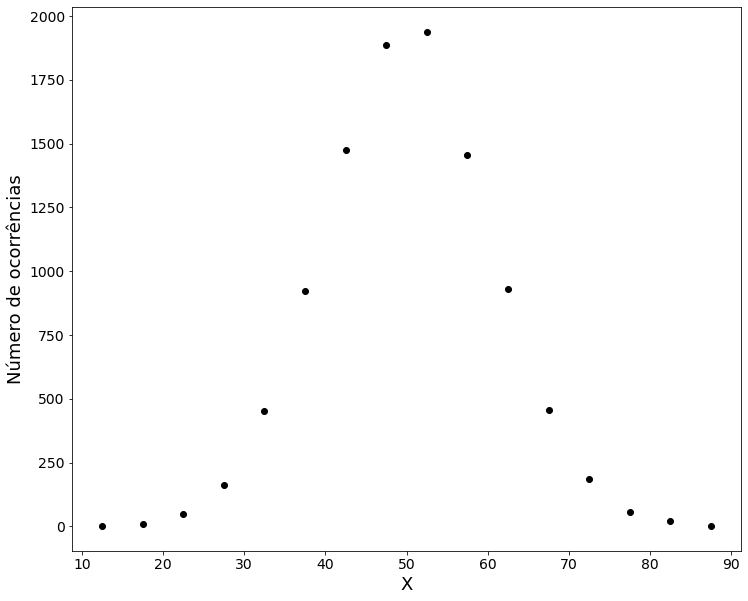

In [ ]:
fig = plt.figure( figsize=(12,10) )
plt.plot( df_cut[ "X" ], df_cut[ "Eventos" ], 'ko' )
plt.xlabel( "X" )
plt.ylabel( "Número de ocorrências" )

Adicionando erros para o número de ocorrências, de acordo com uma distribuição de "Poisson"

In [ ]:
erros_Y = np.sqrt( df_cut[ "Eventos" ] )
erros_Y

2      1.000000
3      3.162278
4      6.855655
5     12.767145
6     21.307276
7     30.347982
8     38.431758
9     43.439613
10    44.022721
11    38.157568
12    30.479501
13    21.377558
14    13.564660
15     7.483315
16     4.358899
17     1.000000
Name: Eventos, dtype: float64

Text(0, 0.5, 'Número de ocorrências')

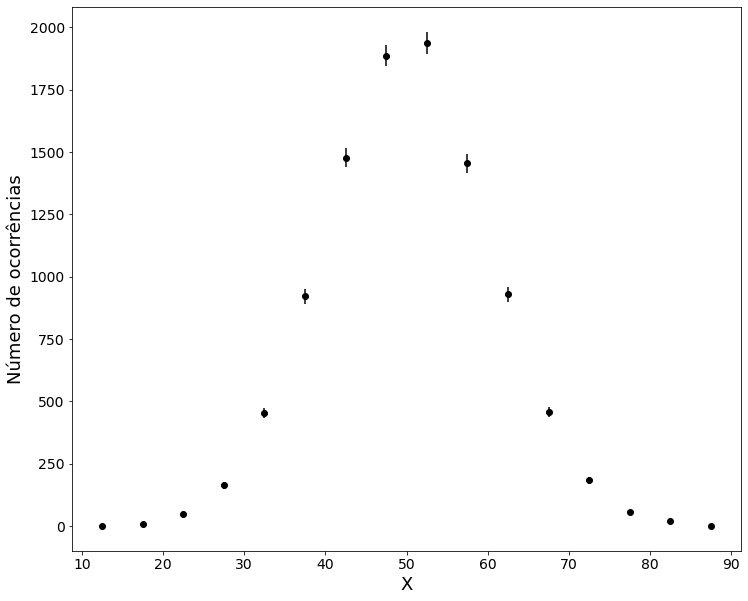

In [ ]:
fig = plt.figure( figsize=(12,10) )
plt.errorbar( df_cut[ "X" ], df_cut[ "Eventos" ], yerr=erros_Y, fmt='ko' )
plt.xlabel( "X" )
plt.ylabel( "Número de ocorrências" )

Ajuste Gaussiano com o pacote genérico "curve_fit"

In [ ]:
from scipy.optimize import curve_fit

def Gaus(x, A, mean, sigma):
    return A * np.exp( -0.5*( (x - mean)/sigma )**2 )

# Em uma otimização numérica, os valores iniciais dos parâmetros (A, mean, sigma) devem estar na região esperada para o ajuste 
p0 = (10., 40., 5.)

popt_gaus, pcov_gaus = curve_fit( Gaus, df_cut[ "X" ], df_cut[ "Eventos" ], sigma=erros_Y, bounds=( [0., -np.inf, 0. ], np.inf ), p0=p0 )

print ( popt_gaus ) # Valores otimizados dos parâmetros
print ( pcov_gaus ) # Matriz de covariância

[1955.91926869   50.10456384   10.18954988]
[[ 4.10406639e+02 -2.31112036e-02 -7.04680761e-01]
 [-2.31112036e-02  7.48514796e-03  1.20645855e-04]
 [-7.04680761e-01  1.20645855e-04  3.67568388e-03]]


Text(0, 0.5, 'Número de ocorrências')

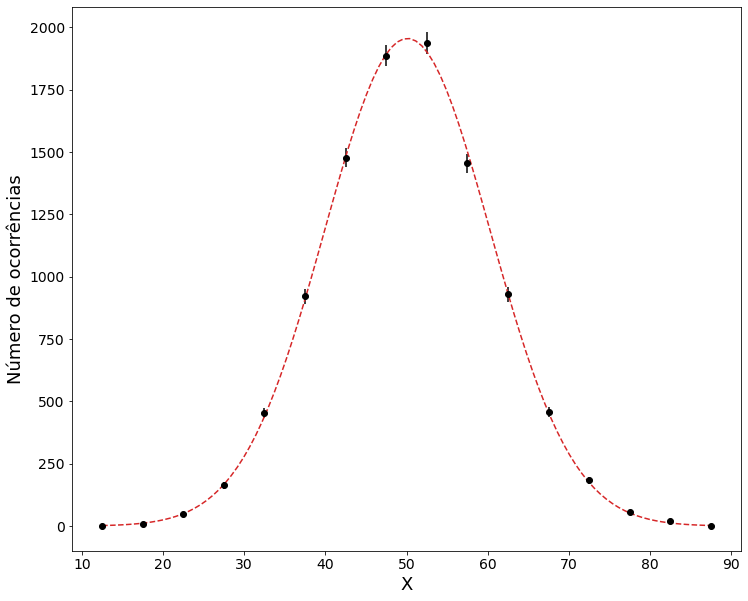

In [ ]:
fig = plt.figure( figsize=(12,10) )
plt.errorbar( df_cut[ "X" ], df_cut[ "Eventos" ], yerr=erros_Y, fmt='ko' )

X_min = df_cut[ "X" ].min()
X_max = df_cut[ "X" ].max()
X_plot = np.linspace( X_min, X_max, 100)
plt.plot( X_plot, Gaus( X_plot, A=popt_gaus[ 0 ], mean=popt_gaus[ 1 ], sigma=popt_gaus[ 2 ] ), linestyle='dashed', color='tab:red' )

plt.xlabel( "X" )
plt.ylabel( "Número de ocorrências" )

Estimativa dos parâmetros

In [ ]:
print ( popt_gaus )
print ( pcov_gaus )
print ( "A = {} ± {}".format( popt_gaus[ 0 ], np.sqrt( pcov_gaus[ 0, 0 ] ) ) )
print ( "mean = {} ± {}".format( popt_gaus[ 1 ], np.sqrt( pcov_gaus[ 1, 1 ] ) ) )
print ( "sigma = {} ± {}".format( popt_gaus[ 2 ], np.sqrt( pcov_gaus[ 2, 2 ] ) ) )

[1955.91926869   50.10456384   10.18954988]
[[ 4.10406639e+02 -2.31112036e-02 -7.04680761e-01]
 [-2.31112036e-02  7.48514796e-03  1.20645855e-04]
 [-7.04680761e-01  1.20645855e-04  3.67568388e-03]]
A = 1955.9192686898182 ± 20.258495467569496
mean = 50.104563844657314 ± 0.08651674961182136
sigma = 10.1895498796637 ± 0.0606274185453497
